# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [99]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [16]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

In [106]:
var = 'Sales'

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000달러)
* Target

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [102]:
data[var].isna().sum()

0

* NaN이 존재하지 않음

4) 가변수화 필요 여부

* 숫자형은 가변수화를 하지 않아도 됨

5) 기초통계량(수치화)

In [103]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

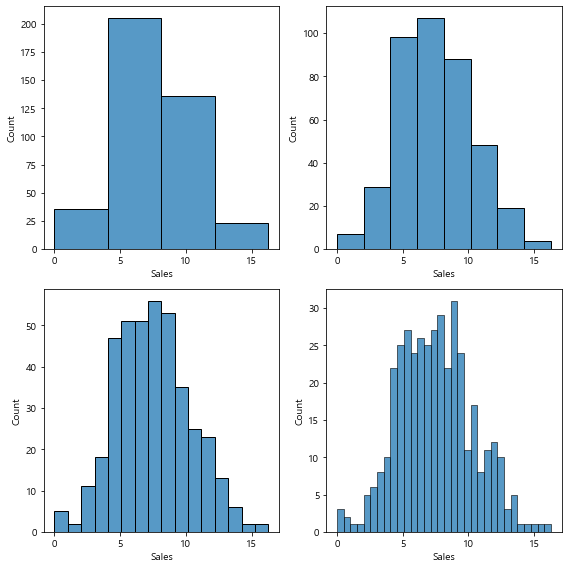

In [107]:
plt.figure(figsize = (8,8))
plt.subplot(2,2,1)
sns.histplot(data[var],bins=4)
plt.subplot(2,2,2)
sns.histplot(data[var],bins=8)
plt.subplot(2,2,3)
sns.histplot(data[var],bins=16)
plt.subplot(2,2,4)
sns.histplot(data[var],bins=32)
plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


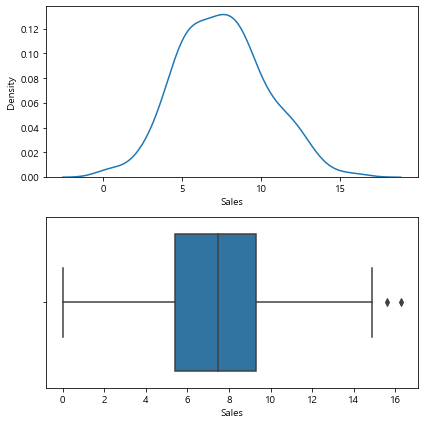

In [104]:
plt.figure(figsize = (6,6))
plt.subplot(2,1,1)
sns.kdeplot(data[var])

box=plt.subplot(2,1,2)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 4000 후반에서 10000까지의 판매 액이 많다.
* 0에서 5000이후로 급격하게 증가하고 10000이후로 급격하게 떨어지는 것을 보아 카시트를 선호하는  소비자들의 경제력은 5000에서 10000사이의  정도이다.

8) 추가 분석해 볼 사항이 있나요?

* 0부터 4500, 4500에서 10000, 10000이후로 나누어서 분석해 볼 필요가 있다.
* 판매량을 지역별로 나누어서 지역에 따른 판매량
* 지역별 선호하는 상품의 가격대

### ② CompPrice

In [25]:
var='CompPrice'

1) 변수의 비즈니스 의미

* 경쟁사 가격(단위 : 달러)	feature

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [27]:
data[var].isna().sum()

0

* NaN 없음

4) 가변수화 필요 여부

* 숫자형은 가변수화가 필요 없다.

5) 기초통계량(수치화)

In [28]:
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

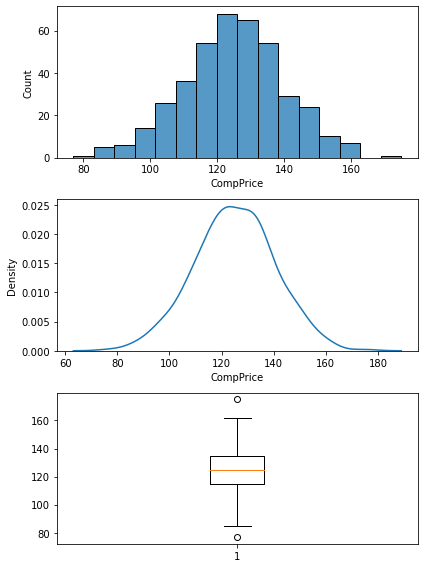

[115.  85.]
[135. 162.]


In [33]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 16)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
box=plt.boxplot(data[var])

plt.tight_layout()
plt.show()
print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 카시트 가격은 115에서 135사이이고 평균이 124로 가격이 형성되어 있다.
* 77달러부터 175 달러까지의 제품을 판매하고 있다.


8) 추가 분석해 볼 사항이 있나요?

* 자사의 카시트 가격과 비교해 볼 필요가 있다.
* 제품의 라인업 별로 얼마의 가격을 형성하고 있는지 분석해 볼 필요가 있다.

### ③ Income

In [35]:
var='Income'

1) 변수의 비즈니스 의미

* 지역 평균 소득(단위 : 1000달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [36]:
data[var].isna().sum()

0

* NaN 은 없다.

4) 가변수화 필요 여부

* 숫자형은 가변수화가 필요 없다.

5) 기초통계량(수치화)

In [37]:
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

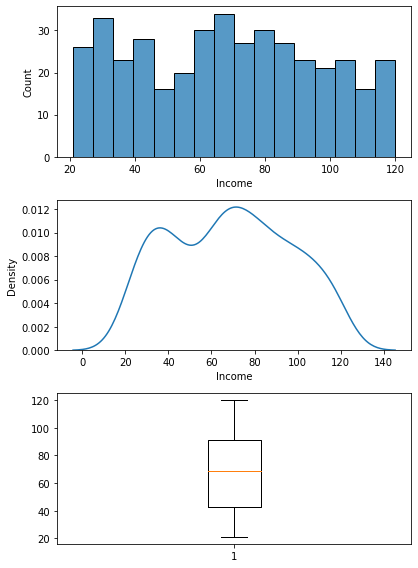

[42.75 21.  ]
[ 91. 120.]


In [38]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 16)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
box=plt.boxplot(data[var])

plt.tight_layout()
plt.show()
print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 2만 1천 ~ 12만 달러의 소득을 사람들이 가지고 있고 평균적으로 약 6만 9천 달러 정도의 소득이 있다.
* 50%의 소득은 4만 2천 750달러에서 9만 1천 달러의 소득이 있다.

8) 추가 분석해 볼 사항이 있나요?

* 지역의 소득과 자사에서 판매 된 카시트의 가격을 비교해서 지역의 소득에 따른 주로 판매되는 카시트의 가격대를 분석해 봐야함
* 지역 소득에 따른 판매량

### ④ Advertising

In [40]:
var = 'Advertising'

1) 변수의 비즈니스 의미

* 각 지역, 회사의 광고 예산(단위 : 1000달러)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [41]:
data[var].isna().sum()

0

* NaN은 존재하지 않는다

4) 가변수화 필요 여부

* 숫자는 가변수화가 필요하지 않다.

5) 기초통계량(수치화)

In [42]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

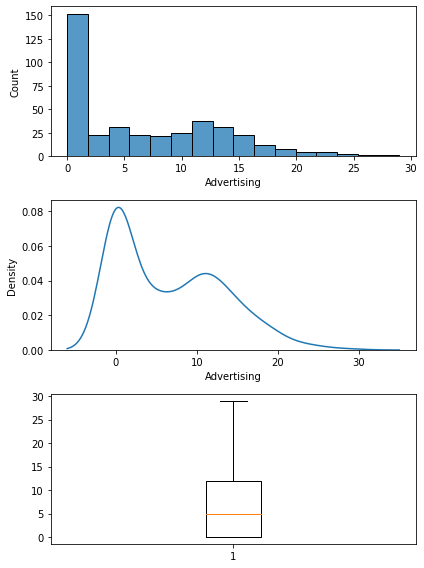

[0. 0.]
[12. 29.]


In [43]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 16)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
box=plt.boxplot(data[var])

plt.tight_layout()
plt.show()
print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 광고비에 0원을 사용하는 지역이 25%이상이다.
* 평균적으로 약 6만 6천 달러를 광고비로 사용한다.

8) 추가 분석해 볼 사항이 있나요?

* 광고비에 따른 지역별 매출액을 분석해 볼 필요가있다.
* 광고비를 많이 쓸 수록 더 비싼 물건을 판매하는지 분석할 필요가 있다. 

### ⑤ Population

In [44]:
var = 'Population'

1) 변수의 비즈니스 의미

지역 인구수(단위 : 1000명)

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [45]:
data[var].isna().sum()

0

* NaN은 없다

4) 가변수화 필요 여부

* 숫자형은 가변수화 하지 않아도 된다.

5) 기초통계량(수치화)

In [46]:
data[var].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

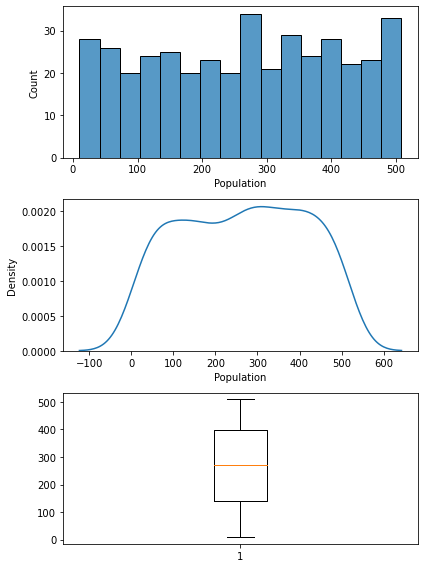

[139.  10.]
[398.5 509. ]


In [47]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 16)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
box=plt.boxplot(data[var])

plt.tight_layout()
plt.show()
print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 평균은 약 264000 이고 거의 지역간에 인구의 차가 크지 않다.

8) 추가 분석해 볼 사항이 있나요?

* 어떤 연령이 많은 지역이 판매율이 많은지 분석해 볼 필요가 있다.
* 지역별 인구 대비 판매율을 분석할 필요 있다.

### ⑥ Price

In [48]:
var = 'Price'

1) 변수의 비즈니스 의미

* 자사 지역별 판매 가격

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [50]:
data[var].isna().sum()

0

* NaN는 없다.

4) 가변수화 필요 여부

* 숫자형은 가변수화가 필요없다.

5) 기초통계량(수치화)

In [51]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

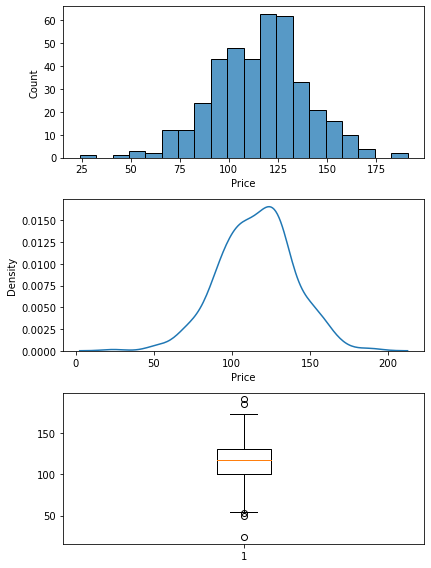

[100.  54.]
[131. 173.]


In [53]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
box=plt.boxplot(data[var])

plt.tight_layout()
plt.show()
print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 100에서 131사이에 주로 포함되어 있다.
* 가격대가 다양하고 가격의 편차가 큰 지역도 있다.

8) 추가 분석해 볼 사항이 있나요?

* 지역마다 왜 판매가격이 다른지, 어떤 상품을 판매하고 있는지 분석이 필요하다.
* 경쟁사의 가격과 자사의 가격의 비교 분석해 볼 필요가 있다.

### ⑦ ShelveLoc

In [56]:
var = 'ShelveLoc' 

1) 변수의 비즈니스 의미

* 상품의 진열 상태

2) 숫자, 범주?

* 범주

3) NaN 존재 유무 및 조치방안

In [57]:
data[var].isna().sum()

0

* NaN 값은 존재하지 않는다

4) 가변수화 필요 여부

In [59]:
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

* 범주형이고 Bad, Good, Medium 으로 되어 있으므로 가변수화가 필요하다.

5) 기초통계량(수치화)

In [60]:
print(data[var].value_counts())
print(data[var].value_counts()/len(data[var]))

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


6) 분포 확인(시각화)

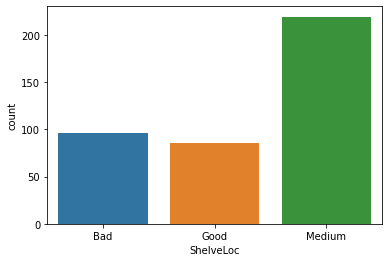

In [62]:
sns.countplot(x = var, data = data)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열정도가 중간인 곳이 약 54%, 나쁜 곳이 24% 좋은 곳이 약 21%가 있다.
* 진열정도가 좋은 곳보다 나쁜 곳이 더 많다.

8) 추가 분석해 볼 사항이 있나요?

* 진열정도에 따른 판매량을 분석 해 볼 필요가 있다.
* 진열정도가 나쁜 지역은 어디인지 분석하여 진열을 개선 할 필요가 있다.

### ⑧ Age

In [64]:
var = 'Age'

1) 변수의 비즈니스 의미

* 지역 인구의 평균 연령

2) 숫자, 범주?

* 숫자

3) NaN 존재 유무 및 조치방안

In [ ]:
data[var].isna().sum()

* NaN은 존재하지 않는다

4) 가변수화 필요 여부

* 숫자형은 가변수화할 필요가 없다.

5) 기초통계량(수치화)

In [65]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

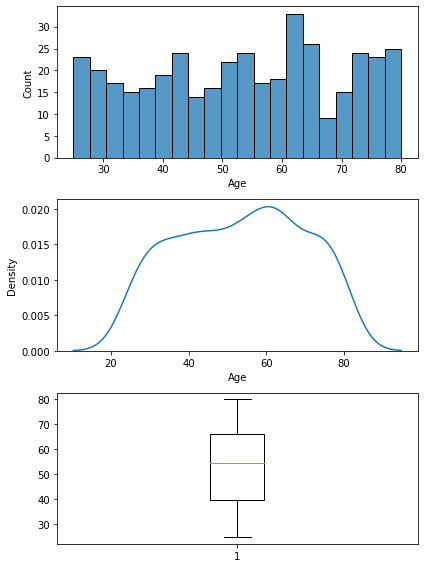

[39.75 25.  ]
[66. 80.]


In [66]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(data[var], bins = 20)

plt.subplot(3,1,2)
sns.kdeplot(data[var])

plt.subplot(3,1,3)
box=plt.boxplot(data[var])

plt.tight_layout()
plt.show()
print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 다양하게 연령대가 구성되어져 있다.
* 젊은 층 뿐만 아니라 노년층도 많다.

8) 추가 분석해 볼 사항이 있나요?

* 연령층에 따른 판매량
* 연령별 선호하는 가격대


### ⑨ Urban

In [68]:
var = 'Urban'

1) 변수의 비즈니스 의미

도심지역여부(0,1)

2) 숫자, 범주?

* 범주

3) NaN 존재 유무 및 조치방안

In [69]:
data[var].isna().sum()

0

* NaN은 존재하지 않는다

4) 가변수화 필요 여부

In [70]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

* 범주형이고 Yes, No로 되어 있기 때문에 가변수화가 필요하다.

5) 기초통계량(수치화)

In [71]:
data[var].value_counts()
data[var].value_counts() / data[var].shape[0]

Yes    0.705
No     0.295
Name: Urban, dtype: float64

6) 분포 확인(시각화)

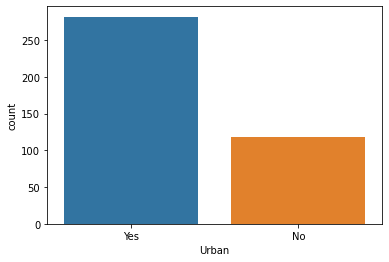

In [74]:
sns.countplot(x = var, data = data)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* Yes는 약 70%, No는 약 30%로 도심지역이 더 많다.

8) 추가 분석해 볼 사항이 있나요?

* 도심지와 아닌곳의 상품 가격 분석
* 도심지와 아닌 곳의 판매량 분석

### ⑩ US

In [80]:
var = 'US'

1) 변수의 비즈니스 의미

* 매장이 미국에 있는지

2) 숫자, 범주?

* 범주

3) NaN 존재 유무 및 조치방안

In [81]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

In [82]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

* 범주형이고 Yes, No이므로 가변수화가 필요하다.

5) 기초통계량(수치화)

In [83]:
data[var].value_counts()
data[var].value_counts() / data[var].shape[0]

Yes    0.645
No     0.355
Name: US, dtype: float64

6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


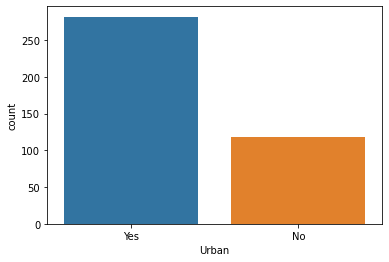

In [79]:
sns.countplot(data[var], order = ['Yes', 'No'])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 약 65%가 미국 매장이므로 대부분이 미국에 매장이 위치하고 있다.

8) 추가 분석해 볼 사항이 있나요?

* 미국매장과 아닌 매장의 판매량, 가격 비교